In [3]:
import os
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

# Get list of all CSV files in the directory
list_of_files = list(Path("../../logs/fainder_results_size").rglob("*.csv"))

# Find the latest file
latest_file = max(list_of_files, key=os.path.getctime)

# Load the latest CSV file into a DataFrame
df_latest = pd.read_csv(latest_file)
# timestamp,fainder_mode,threshold,percentile,result_size

print(f"Latest file: {latest_file}")
# Print the first few rows of the DataFrame
print(df_latest.head())
# Create figures directory if it doesn't exist
figures_dir = Path("figures")
if not figures_dir.exists():
    figures_dir.mkdir(exist_ok=True)

Latest file: ../../logs/fainder_results_size/fainder_results_size_20250515_103651.csv
             timestamp fainder_mode  threshold  percentile  result_size
0  2025-05-15 10:37:43  full_recall          1         0.1      6156331
1  2025-05-15 10:38:10        exact          1         0.1      5334372
2  2025-05-15 10:38:13  full_recall          1         0.2      5820394
3  2025-05-15 10:38:39        exact          1         0.2      5079615
4  2025-05-15 10:38:42  full_recall          1         0.3      5613779


In [4]:
import numpy as np
import statsmodels.api as sm

# Filter for 'exact' mode
df_exact = df_latest[df_latest["fainder_mode"] == "exact"].copy()

# Log-transform the threshold for better scaling
df_exact["log_threshold"] = np.log10(df_exact["threshold"])

# Prepare features and target
X = df_exact[["log_threshold", "percentile"]]
X = sm.add_constant(X)  # Add intercept
y = df_exact["result_size"]

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Summarize the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            result_size   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           8.03e-29
Time:                        15:17:27   Log-Likelihood:                -1478.0
No. Observations:                 100   AIC:                             2962.
Df Residuals:                      97   BIC:                             2970.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.776e+06   1.72e+05     33.587      0.000    5.43e+06    6.12e+06
log_threshold  3.575e+05   2.24e+04     15.932      0.000    3.13e+05    4.02e+05
percentile    -9.344e+05   2.24e+05     -4.165      0.000   -1.38e+06   -4.89e+05
==============================================================================
Omnibus:                       17.829   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.067
Skew:                          -0.934   Prob(JB):                     1.61e-05
Kurtosis:                       4.343   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

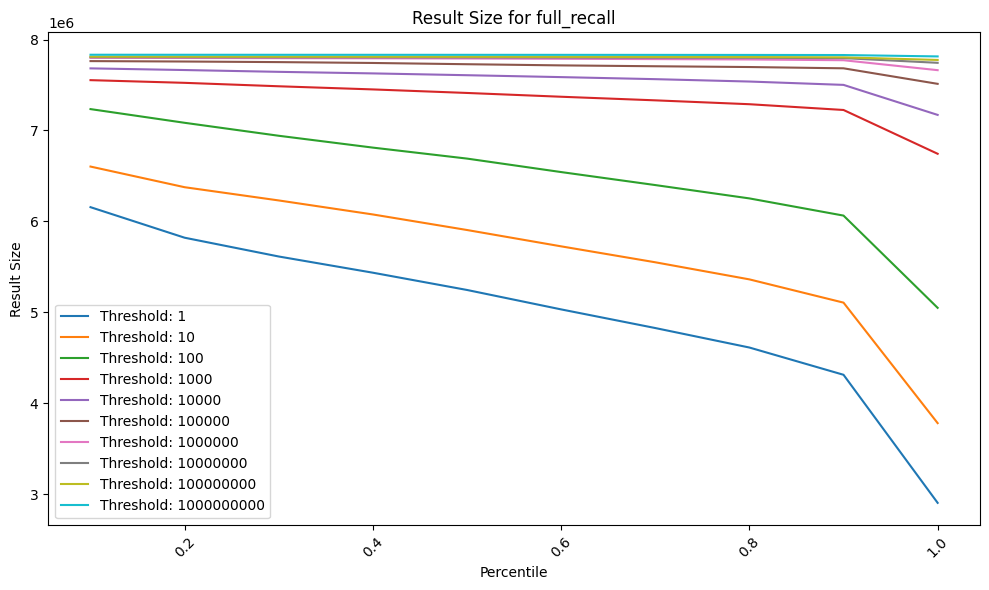

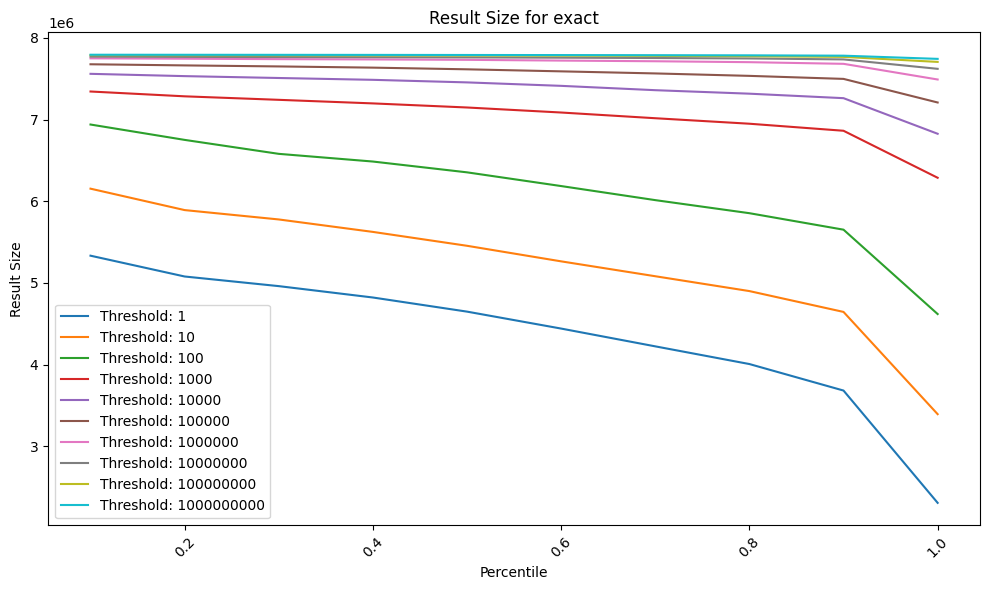

In [5]:
# plot the result size for each fainder mode (new plot)
# with lines for each threshold and percentile on the x-axis

for fainder_mode in df_latest["fainder_mode"].unique():
    df_fainder_mode = df_latest[df_latest["fainder_mode"] == fainder_mode]
    plt.figure(figsize=(10, 6))
    for threshold in df_fainder_mode["threshold"].unique():
        df_threshold = df_fainder_mode[df_fainder_mode["threshold"] == threshold]
        plt.plot(
            df_threshold["percentile"],
            df_threshold["result_size"],
            label=f"Threshold: {threshold}",
        )

    plt.title(f"Result Size for {fainder_mode}")
    plt.xlabel("Percentile")
    plt.ylabel("Result Size")
    plt.legend()
    plt.xticks(rotation=45)
    plt.yscale("linear")
    plt.tight_layout()
    plt.savefig(f"figures/result_size_{fainder_mode}.png")

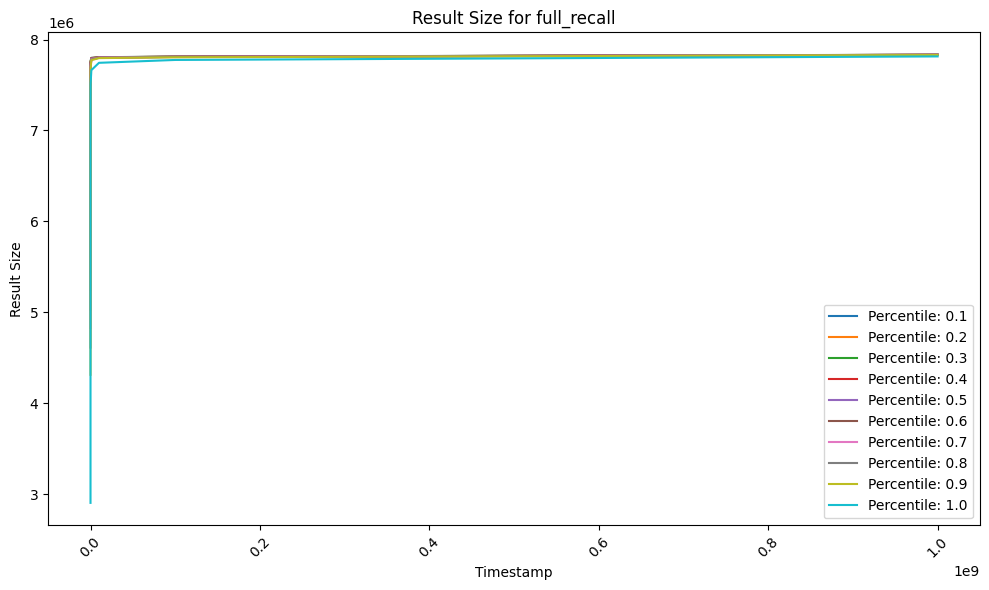

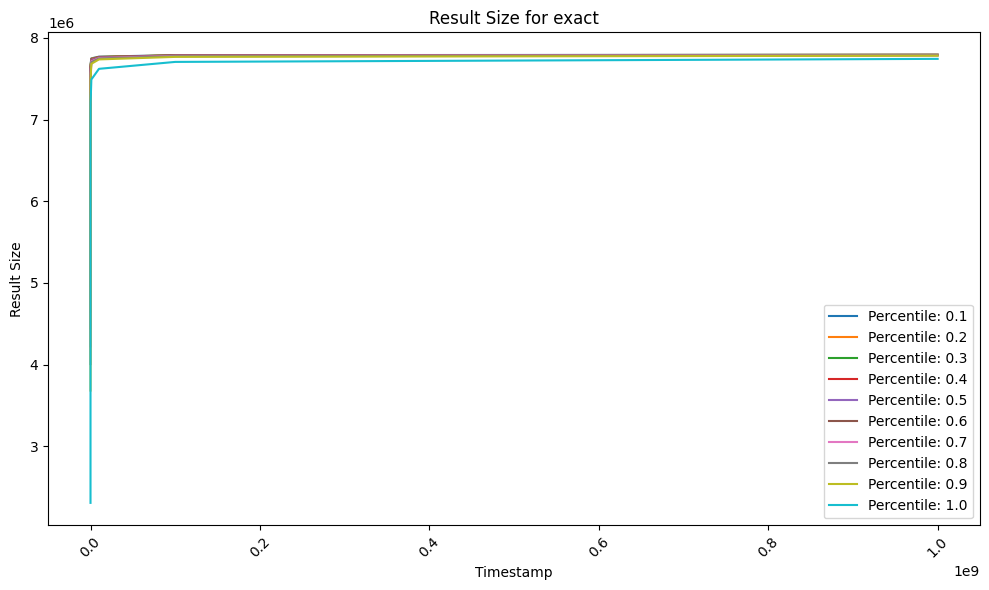

In [6]:
# plot the result size for each fainder mode (new plot)
# with lines for each percentile and threeshold on the x-axis

for fainder_mode in df_latest["fainder_mode"].unique():
    df_fainder_mode = df_latest[df_latest["fainder_mode"] == fainder_mode]
    plt.figure(figsize=(10, 6))
    for percentile in df_fainder_mode["percentile"].unique():
        df_percentile = df_fainder_mode[df_fainder_mode["percentile"] == percentile]
        plt.plot(
            df_percentile["threshold"],
            df_percentile["result_size"],
            label=f"Percentile: {percentile}",
        )

    plt.title(f"Result Size for {fainder_mode}")
    plt.xlabel("Timestamp")
    plt.ylabel("Result Size")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"figures/result_size_{fainder_mode}_percentile.png")